In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Residential_Energy_NY_2018.csv', low_memory=False)

In [3]:
data.head()

,Reporting Period,Home Performance Project ID,Home Performance Site ID,Project County,Project City,Project Zip,Gas Utility,Electric Utility,Project Completion Date,Customer Type,...,Year Home Built,Size of Home,Volume of Home,Number of Units,Measure Type,Estimated Annual kWh Savings,Estimated Annual MMBtu Savings,First Year Energy Savings $ Estimate,Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N),Location
0,2018-06-30T00:00:00,P00000719542,S00000123281,Tompkins,Dryden,13053,New York State Electric & Gas,New York State Electric & Gas,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,0.0,12.0,-588,No,"{'latitude': '42.477832', 'human_address': '{""..."
1,2018-06-30T00:00:00,P00000723499,S00000105418,Onondaga,Syracuse,13206,National Grid,National Grid,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5,No,"{'latitude': '43.071381', 'human_address': '{""..."
2,2018-06-30T00:00:00,P00000725120,S00000081112,Onondaga,Syracuse,13210,National Grid,National Grid,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7,No,"{'latitude': '43.034152', 'human_address': '{""..."
3,2018-06-30T00:00:00,P00000724133,S00000127292,Onondaga,Syracuse,13212,National Grid,National Grid,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,11,No,"{'latitude': '43.126591', 'human_address': '{""..."
4,2018-06-30T00:00:00,P00000722464,S00000092261,Monroe,Brockport,14420,Rochester Gas & Electric,National Grid,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,8.0,1.0,13,No,"{'latitude': '43.21043', 'human_address': '{""a..."


In [4]:
data.columns

Index(['Reporting Period', 'Home Performance Project ID',
       'Home Performance Site ID', 'Project County', 'Project City',
       'Project Zip', 'Gas Utility', 'Electric Utility',
       'Project Completion Date', 'Customer Type',
       'Low-Rise or Home Performance Indicator', 'Total Project Cost',
       'Total Incentives', 'Type of Program Financing',
       'Amount Financed Through Program',
       'Pre-Retrofit Home Heating Fuel Type', 'Year Home Built',
       'Size of Home', 'Volume of Home', 'Number of Units', 'Measure Type',
       'Estimated Annual kWh Savings', 'Estimated Annual MMBtu Savings',
       'First Year Energy Savings $ Estimate',
       'Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)',
       'Location'],
      dtype='object')

In [5]:
data['Project County'].unique().tolist()

['Tompkins',
 'Onondaga',
 'Monroe',
 'Oneida',
 'Erie',
 'Westchester',
 'Ontario',
 'Albany',
 'Wayne',
 'Cattaraugus',
 'Rockland',
 'Niagara',
 'Livingston',
 'Cayuga',
 'Broome',
 'Rensselaer',
 'Genesee',
 'Oswego',
 'Saratoga',
 'Orange',
 'Saint Lawrence',
 'Tioga',
 'Jefferson',
 'Dutchess',
 'Ulster',
 'Fulton',
 'Schenectady',
 'Queens',
 'Greene',
 'Otsego',
 'Cortland',
 'Washington',
 'Chautauqua',
 'Montgomery',
 'Chemung',
 'Steuben',
 'Sullivan',
 'Wyoming',
 'Lewis',
 'Columbia',
 'Yates',
 'Herkimer',
 'Madison',
 'Suffolk',
 'Kings',
 'Seneca',
 'Warren',
 'Orleans',
 'Essex',
 'Chenango',
 'Bronx',
 'Richmond',
 'Schuyler',
 'New York',
 'Franklin',
 'Delaware',
 'Nassau',
 'Schoharie',
 'Allegany',
 'Clinton',
 'Putnam',
 'Hamilton']

In [6]:
data.isnull().sum()

Reporting Period                                                            0
Home Performance Project ID                                                 0
Home Performance Site ID                                                    0
Project County                                                              0
Project City                                                                0
Project Zip                                                                 0
Gas Utility                                                             14922
Electric Utility                                                            0
Project Completion Date                                                     0
Customer Type                                                               0
Low-Rise or Home Performance Indicator                                      0
Total Project Cost                                                          0
Total Incentives                                                

In [7]:
data.shape

(50844, 26)

In [8]:
data['Estimated Annual kWh Savings'].sum()

23005325.0

In [9]:
data['Estimated Annual kWh Savings'] = data['Estimated Annual kWh Savings'].dropna()

In [10]:
data['Estimated Annual kWh Savings'].sum()

23005325.0

In [11]:
county_list = data['Project County'].unique()
county_list

array(['Tompkins', 'Onondaga', 'Monroe', 'Oneida', 'Erie', 'Westchester',
       'Ontario', 'Albany', 'Wayne', 'Cattaraugus', 'Rockland', 'Niagara',
       'Livingston', 'Cayuga', 'Broome', 'Rensselaer', 'Genesee',
       'Oswego', 'Saratoga', 'Orange', 'Saint Lawrence', 'Tioga',
       'Jefferson', 'Dutchess', 'Ulster', 'Fulton', 'Schenectady',
       'Queens', 'Greene', 'Otsego', 'Cortland', 'Washington',
       'Chautauqua', 'Montgomery', 'Chemung', 'Steuben', 'Sullivan',
       'Wyoming', 'Lewis', 'Columbia', 'Yates', 'Herkimer', 'Madison',
       'Suffolk', 'Kings', 'Seneca', 'Warren', 'Orleans', 'Essex',
       'Chenango', 'Bronx', 'Richmond', 'Schuyler', 'New York',
       'Franklin', 'Delaware', 'Nassau', 'Schoharie', 'Allegany',
       'Clinton', 'Putnam', 'Hamilton'], dtype=object)

In [18]:
data2 = data.groupby('Project County').sum()


#saving_energy = data2['Estimated Annual kWh Savings'].sum()
#saving_energy

In [19]:
import seaborn as sns
import sys
sys.__stdout__=sys.stdout

In [20]:
data2

,Project Zip,Total Project Cost,Total Incentives,Amount Financed Through Program,Year Home Built,Size of Home,Volume of Home,Number of Units,Estimated Annual kWh Savings,Estimated Annual MMBtu Savings,First Year Energy Savings $ Estimate
Project County,,,,,,,,,,,
Albany,10349596,7382034,1579369,2805145.0,38731.0,40355.0,407874.0,21.0,908127.0,27127.0,621652
Allegany,414514,315008,68577,111983.0,5642.0,4788.0,46208.0,3.0,21686.0,1112.0,17433
Bronx,900032,1040414,170677,593540.0,5892.0,6020.0,65380.0,3.0,33876.0,3986.0,98954
Broome,10005989,6624563,1535591,3023375.0,46678.0,33505.0,493124.0,24.0,454573.0,30145.0,488148
Cattaraugus,926589,606322,126119,285976.0,0.0,0.0,0.0,0.0,66243.0,2834.0,58939
Cayuga,4809222,3667585,647401,1780845.0,30384.0,26300.0,307937.0,16.0,166020.0,13600.0,280672
Chautauqua,2785465,1678058,329281,807388.0,19359.0,23160.0,263884.0,10.0,292815.0,6821.0,122104
Chemung,7229510,3592389,660918,1044451.0,77900.0,70793.0,633221.0,42.0,99619.0,14659.0,226309
Chenango,1877454,1092400,301212,432254.0,7800.0,6363.0,90433.0,4.0,75429.0,4801.0,118781


In [25]:
data3 = data2.reset_index(level = 'Project County', inplace= False, drop = False )

In [26]:
data3.columns

Index(['Project County', 'Project Zip', 'Total Project Cost',
       'Total Incentives', 'Amount Financed Through Program',
       'Year Home Built', 'Size of Home', 'Volume of Home', 'Number of Units',
       'Estimated Annual kWh Savings', 'Estimated Annual MMBtu Savings',
       'First Year Energy Savings $ Estimate'],
      dtype='object')

# Visualization using matplotlib

Text(0, 0.5, 'Estimated Annual kWh Savings')

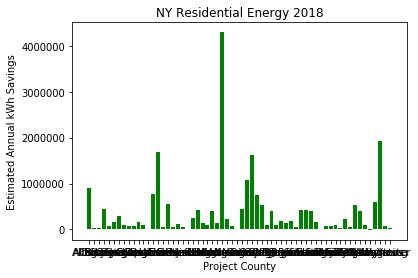

In [48]:
plt.bar(data3['Project County'], data3['Estimated Annual kWh Savings'], color='green')
plt.title('NY Residential Energy 2018')
plt.xlabel('Project County')
plt.ylabel('Estimated Annual kWh Savings')

# Visualization using Pandas

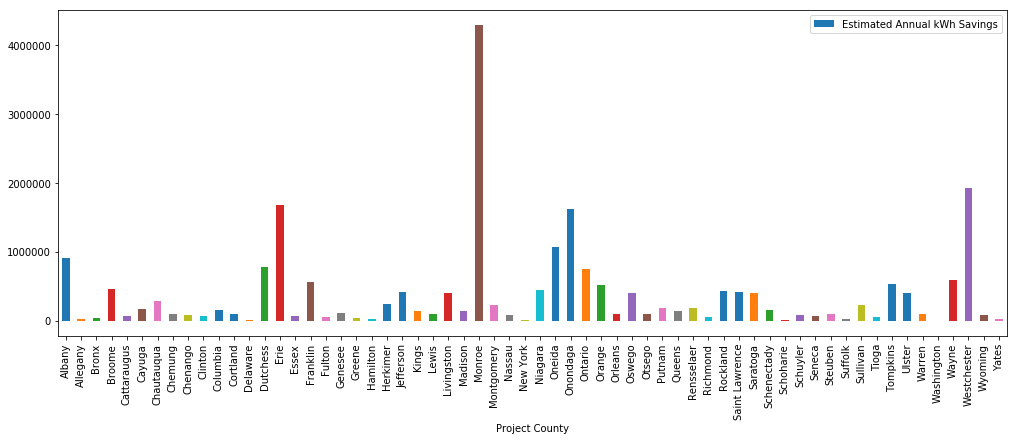

In [44]:
data3.plot.bar(x = 'Project County', y = 'Estimated Annual kWh Savings', figsize=(17,6) )


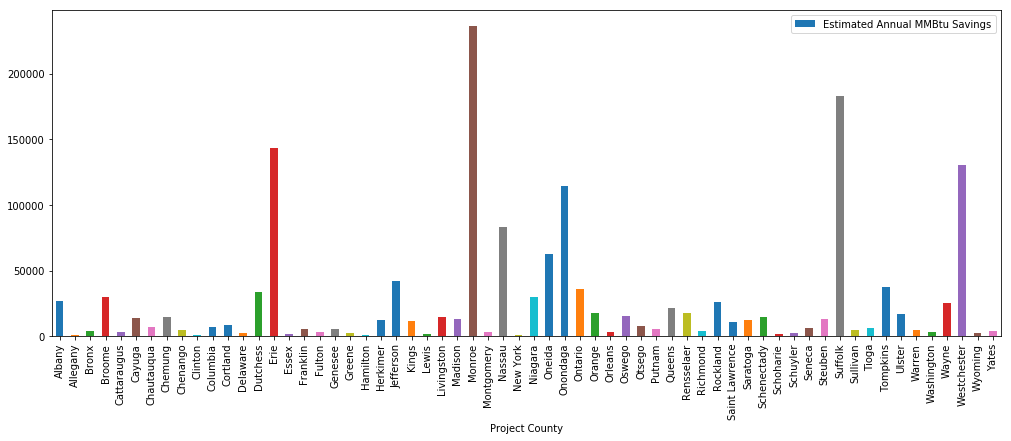

In [49]:
data3.plot.bar(x = 'Project County', y = 'Estimated Annual MMBtu Savings', figsize=(17,6) )


# MMBTu means One Million British Thermal units, A BTU is a measure of the energy content in 
# fuel, and is is used in the power, steam generation, heating and air conditioning industries. 
# One BTU is equivalent to1.06 Joules.


# The British thermal unit (Btu or BTU) is a non-SI, traditional unit of heat; it is defined as the amount
# of heat required to raise the temperature of one pound of water by one degree Fahrenheit. It is also part 
# of the United States customary units.

In [53]:
data_gas_utility = data.groupby('Gas Utility').sum()

In [54]:
data_gas_utility

,Project Zip,Total Project Cost,Total Incentives,Amount Financed Through Program,Year Home Built,Size of Home,Volume of Home,Number of Units,Estimated Annual kWh Savings,Estimated Annual MMBtu Savings,First Year Energy Savings $ Estimate
Gas Utility,,,,,,,,,,,
Central Hudson Gas & Electric,7138681,5830800,1385425,1952133.0,29142.0,26146.0,316085.0,15.0,794711.0,21286.0,479722
Consolidated Edison,19343056,21773939,2365057,6223723.0,163188.0,241371.0,2446072.0,84.0,981526.0,67427.0,1584032
Corning Natural Gas,1380380,591799,87463,132822.0,71438.0,70562.0,641840.0,40.0,9794.0,1987.0,26176
KeySpan Energy,405847,356849,81256,96348.0,0.0,0.0,0.0,0.0,10780.0,1618.0,34054
Long Island Power Authority,117472,180870,5389,150428.0,0.0,0.0,0.0,0.0,0.0,198.0,8895
Multiple Gas Providers,1207427,999216,138841,75286.0,0.0,0.0,0.0,0.0,-42971.0,2722.0,68494
Municipal,309223,246062,15703,172449.0,0.0,0.0,0.0,0.0,167903.0,130.0,18774
National Fuel Distribution,72937699,33444632,8697161,9607616.0,0.0,0.0,0.0,0.0,2138361.0,168336.0,2224622
National Fuel Gas Distribution,4492509,2281123,742302,829624.0,613272.0,525271.0,5355426.0,339.0,117910.0,5153.0,67933


In [55]:
data_gas_utility.shape

(16, 11)

In [56]:
# data3 = data2.reset_index(level = 'Project County', inplace= False, drop = False )
data_gas_utility2 = data_gas_utility.reset_index(level = 'Gas Utility', inplace = False, drop = False)
data_gas_utility2

,Gas Utility,Project Zip,Total Project Cost,Total Incentives,Amount Financed Through Program,Year Home Built,Size of Home,Volume of Home,Number of Units,Estimated Annual kWh Savings,Estimated Annual MMBtu Savings,First Year Energy Savings $ Estimate
0,Central Hudson Gas & Electric,7138681,5830800,1385425,1952133.0,29142.0,26146.0,316085.0,15.0,794711.0,21286.0,479722
1,Consolidated Edison,19343056,21773939,2365057,6223723.0,163188.0,241371.0,2446072.0,84.0,981526.0,67427.0,1584032
2,Corning Natural Gas,1380380,591799,87463,132822.0,71438.0,70562.0,641840.0,40.0,9794.0,1987.0,26176
3,KeySpan Energy,405847,356849,81256,96348.0,0.0,0.0,0.0,0.0,10780.0,1618.0,34054
4,Long Island Power Authority,117472,180870,5389,150428.0,0.0,0.0,0.0,0.0,0.0,198.0,8895
5,Multiple Gas Providers,1207427,999216,138841,75286.0,0.0,0.0,0.0,0.0,-42971.0,2722.0,68494
6,Municipal,309223,246062,15703,172449.0,0.0,0.0,0.0,0.0,167903.0,130.0,18774
7,National Fuel Distribution,72937699,33444632,8697161,9607616.0,0.0,0.0,0.0,0.0,2138361.0,168336.0,2224622
8,National Fuel Gas Distribution,4492509,2281123,742302,829624.0,613272.0,525271.0,5355426.0,339.0,117910.0,5153.0,67933
9,National Grid,163104508,89389722,19801993,29029880.0,547696.0,488962.0,5234076.0,299.0,5554370.0,356046.0,5565067


# Visualization with Matplotlib

Text(0, 0.5, 'Estimated Annual kWh Savings')

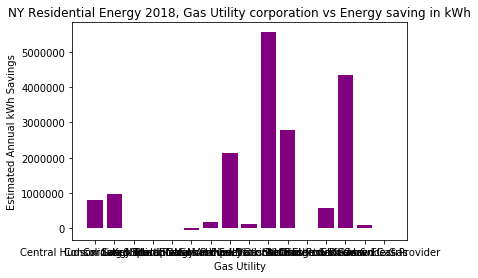

In [59]:
plt.bar(data_gas_utility2['Gas Utility'], data_gas_utility2['Estimated Annual kWh Savings'], color='purple')
plt.title('NY Residential Energy 2018, Gas Utility corporation vs Energy saving in kWh')
plt.xlabel('Gas Utility')
plt.ylabel('Estimated Annual kWh Savings')

# Visualization using Pandas
# Estimated Annual kWh Savings vs Gas Utility 

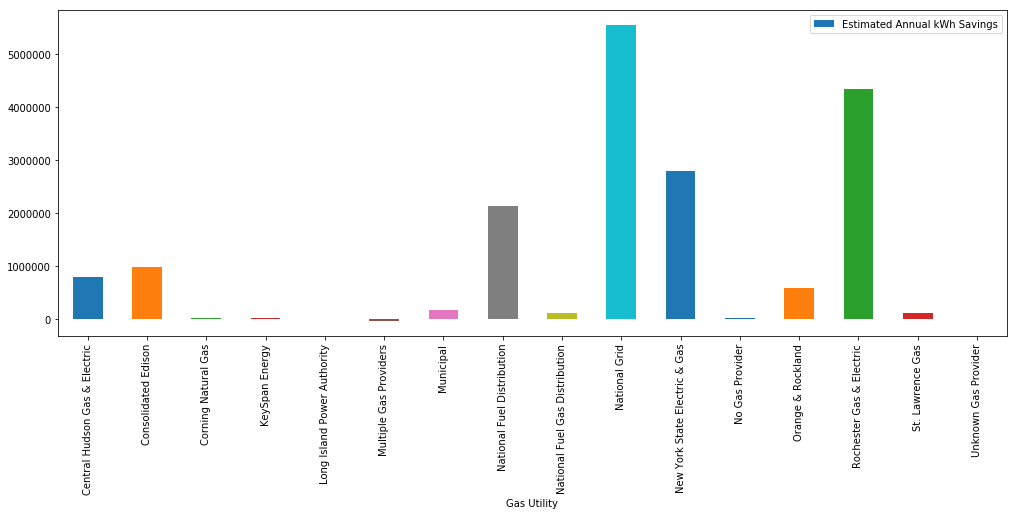

In [60]:
data_gas_utility2.plot.bar(x = 'Gas Utility', y = 'Estimated Annual kWh Savings', figsize=(17,6) )

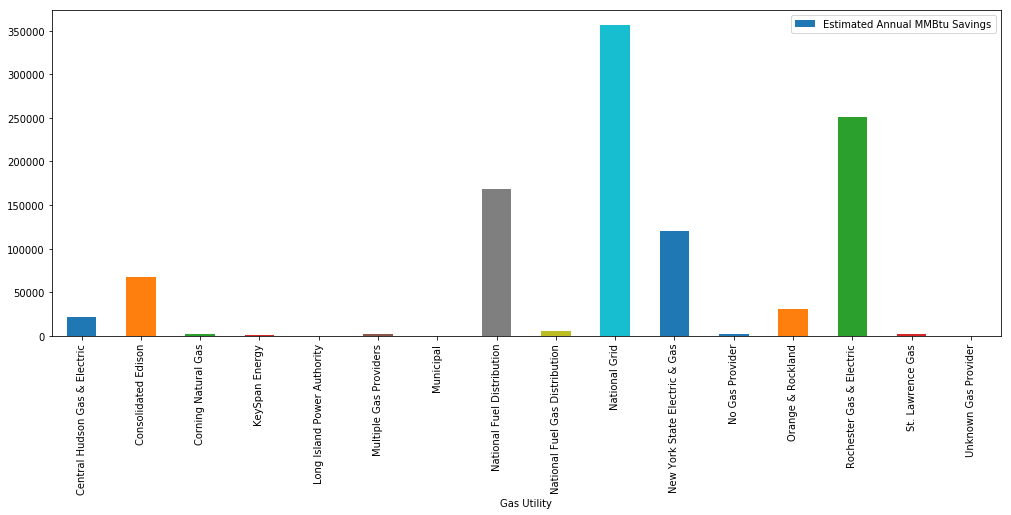

In [61]:
data_gas_utility2.plot.bar(x = 'Gas Utility', y = 'Estimated Annual MMBtu Savings', figsize=(17,6) )

In [62]:
data.head()

,Reporting Period,Home Performance Project ID,Home Performance Site ID,Project County,Project City,Project Zip,Gas Utility,Electric Utility,Project Completion Date,Customer Type,...,Year Home Built,Size of Home,Volume of Home,Number of Units,Measure Type,Estimated Annual kWh Savings,Estimated Annual MMBtu Savings,First Year Energy Savings $ Estimate,Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N),Location
0,2018-06-30T00:00:00,P00000719542,S00000123281,Tompkins,Dryden,13053,New York State Electric & Gas,New York State Electric & Gas,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,0.0,12.0,-588,No,"{'latitude': '42.477832', 'human_address': '{""..."
1,2018-06-30T00:00:00,P00000723499,S00000105418,Onondaga,Syracuse,13206,National Grid,National Grid,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5,No,"{'latitude': '43.071381', 'human_address': '{""..."
2,2018-06-30T00:00:00,P00000725120,S00000081112,Onondaga,Syracuse,13210,National Grid,National Grid,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7,No,"{'latitude': '43.034152', 'human_address': '{""..."
3,2018-06-30T00:00:00,P00000724133,S00000127292,Onondaga,Syracuse,13212,National Grid,National Grid,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,11,No,"{'latitude': '43.126591', 'human_address': '{""..."
4,2018-06-30T00:00:00,P00000722464,S00000092261,Monroe,Brockport,14420,Rochester Gas & Electric,National Grid,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,8.0,1.0,13,No,"{'latitude': '43.21043', 'human_address': '{""a..."


In [64]:
data_electric_utility = data.groupby('Electric Utility').sum()
data_electric_utility

,Project Zip,Total Project Cost,Total Incentives,Amount Financed Through Program,Year Home Built,Size of Home,Volume of Home,Number of Units,Estimated Annual kWh Savings,Estimated Annual MMBtu Savings,First Year Energy Savings $ Estimate
Electric Utility,,,,,,,,,,,
Central Hudson Gas & Electric,20153747,17885530,3451771,7851288.0,97325.0,98670.0,1165814.0,50.0,1552825.0,60072.0,1762496
Consolidated Edison,39169328,45363911,5750791,13791164.0,294815.0,412840.0,4119033.0,161.0,1625557.0,139047.0,4160498
Long Island Power Authority,82797208,77897770,14849327,30929664.0,0.0,0.0,0.0,0.0,81774.0,273444.0,8446814
Municipal,8918325,5028243,871022,2075545.0,72177.0,71976.0,742610.0,44.0,622995.0,18047.0,360191
National Grid,252197296,132371309,30313317,43538729.0,1398466.0,1216582.0,12697326.0,754.0,10354904.0,529281.0,9681436
New York State Electric & Gas,106080056,68460978,13291975,24958924.0,822711.0,765178.0,7982062.0,439.0,4306661.0,260630.0,5273726
Orange & Rockland,10311716,9845028,1628838,5126560.0,80589.0,105869.0,960474.0,41.0,690838.0,38497.0,793725
PSEG Long Island,338087,357246,15366,285610.0,21508.0,21604.0,203506.0,11.0,19969.0,862.0,34576
Rochester Gas & Electric,153055174,71662453,14603163,16133002.0,1924055.0,1741080.0,17528643.0,1024.0,3749802.0,259867.0,3870404


In [65]:
data_electric_utility2 = data_electric_utility.reset_index(level = 'Electric Utility', inplace = False, drop = False )
data_electric_utility2

,Electric Utility,Project Zip,Total Project Cost,Total Incentives,Amount Financed Through Program,Year Home Built,Size of Home,Volume of Home,Number of Units,Estimated Annual kWh Savings,Estimated Annual MMBtu Savings,First Year Energy Savings $ Estimate
0,Central Hudson Gas & Electric,20153747,17885530,3451771,7851288.0,97325.0,98670.0,1165814.0,50.0,1552825.0,60072.0,1762496
1,Consolidated Edison,39169328,45363911,5750791,13791164.0,294815.0,412840.0,4119033.0,161.0,1625557.0,139047.0,4160498
2,Long Island Power Authority,82797208,77897770,14849327,30929664.0,0.0,0.0,0.0,0.0,81774.0,273444.0,8446814
3,Municipal,8918325,5028243,871022,2075545.0,72177.0,71976.0,742610.0,44.0,622995.0,18047.0,360191
4,National Grid,252197296,132371309,30313317,43538729.0,1398466.0,1216582.0,12697326.0,754.0,10354904.0,529281.0,9681436
5,New York State Electric & Gas,106080056,68460978,13291975,24958924.0,822711.0,765178.0,7982062.0,439.0,4306661.0,260630.0,5273726
6,Orange & Rockland,10311716,9845028,1628838,5126560.0,80589.0,105869.0,960474.0,41.0,690838.0,38497.0,793725
7,PSEG Long Island,338087,357246,15366,285610.0,21508.0,21604.0,203506.0,11.0,19969.0,862.0,34576
8,Rochester Gas & Electric,153055174,71662453,14603163,16133002.0,1924055.0,1741080.0,17528643.0,1024.0,3749802.0,259867.0,3870404


In [66]:
data_electric_utility2.shape

(9, 12)

# Pandas data visualization
# Estimated Annual kWh Savings vs Electric Utility

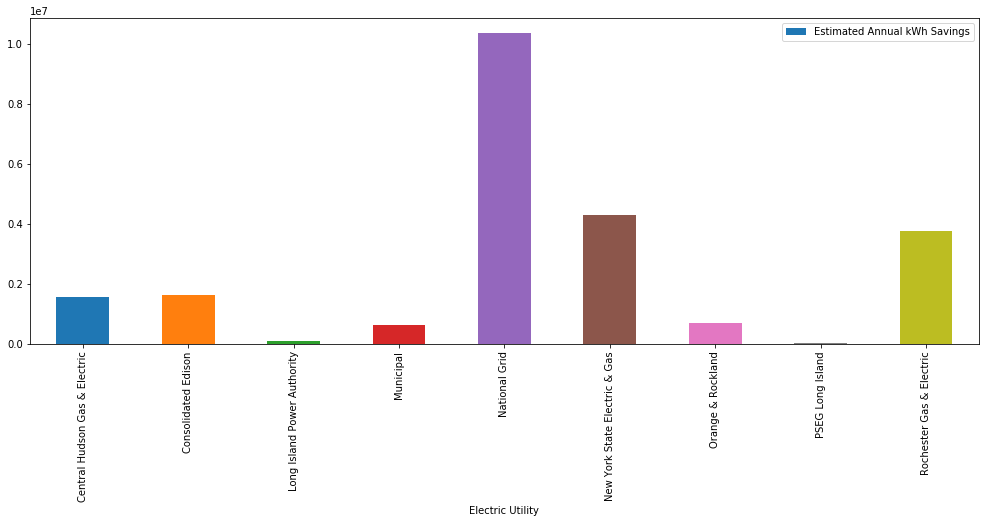

In [68]:
data_electric_utility2.plot.bar(x = 'Electric Utility', y = 'Estimated Annual kWh Savings', figsize=(17,6) )

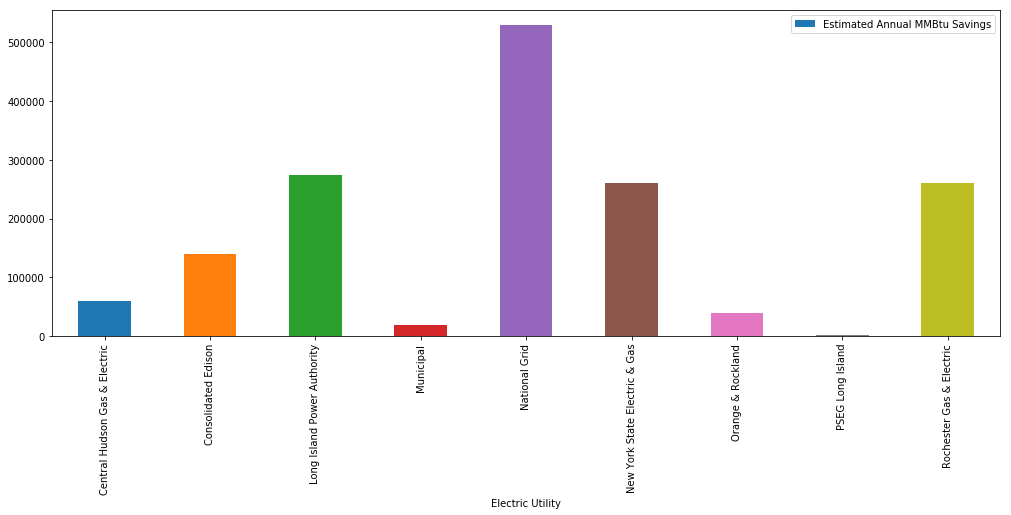

In [69]:
data_electric_utility2.plot.bar(x = 'Electric Utility', y = 'Estimated Annual MMBtu Savings', figsize=(17,6) )

In [80]:
data_National_Grid = data[data['Gas Utility'] == 'National Grid']
data_National_Grid

,Reporting Period,Home Performance Project ID,Home Performance Site ID,Project County,Project City,Project Zip,Gas Utility,Electric Utility,Project Completion Date,Customer Type,...,Year Home Built,Size of Home,Volume of Home,Number of Units,Measure Type,Estimated Annual kWh Savings,Estimated Annual MMBtu Savings,First Year Energy Savings $ Estimate,Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N),Location
1,2018-06-30T00:00:00,P00000723499,S00000105418,Onondaga,Syracuse,13206,National Grid,National Grid,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5,No,"{'latitude': '43.071381', 'human_address': '{""..."
2,2018-06-30T00:00:00,P00000725120,S00000081112,Onondaga,Syracuse,13210,National Grid,National Grid,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7,No,"{'latitude': '43.034152', 'human_address': '{""..."
3,2018-06-30T00:00:00,P00000724133,S00000127292,Onondaga,Syracuse,13212,National Grid,National Grid,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,11,No,"{'latitude': '43.126591', 'human_address': '{""..."
9,2018-06-30T00:00:00,P00000723817,S00000127019,Onondaga,Cicero,13039,National Grid,National Grid,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,150.0,7.0,121,No,"{'latitude': '43.172813', 'human_address': '{""..."
11,2018-06-30T00:00:00,P00000721701,S00000125128,Onondaga,Syracuse,13224,National Grid,National Grid,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,486.0,16.0,310,No,"{'latitude': '43.041391', 'human_address': '{""..."
12,2018-06-30T00:00:00,P00000724283,S00000127424,Oneida,Clayville,13322,National Grid,National Grid,2010-11-15T00:00:00,Assisted,...,NaN,NaN,NaN,NaN,NaN,0.0,14.0,315,No,"{'latitude': '42.968144', 'human_address': '{""..."
19,2018-06-30T00:00:00,P00000724110,S00000127274,Albany,Albany,12203,National Grid,National Grid,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,85.0,19.0,491,No,"{'latitude': '42.680815', 'human_address': '{""..."
20,2018-06-30T00:00:00,P00000724360,S00000127487,Oneida,New Hartford,13413,National Grid,National Grid,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,0.0,21.0,515,No,"{'latitude': '43.066343', 'human_address': '{""..."
22,2018-06-30T00:00:00,P00000721766,S00000125186,Onondaga,Syracuse,13205,National Grid,National Grid,2010-11-15T00:00:00,Assisted,...,NaN,NaN,NaN,NaN,NaN,0.0,40.0,575,No,"{'latitude': '43.00819', 'human_address': '{""a..."
27,2018-06-30T00:00:00,P00000722796,S00000126110,Albany,Albany,12208,National Grid,National Grid,2010-11-15T00:00:00,Market,...,NaN,NaN,NaN,NaN,NaN,283.0,58.0,861,No,"{'latitude': '42.655144', 'human_address': '{""..."


In [81]:
data_National_Grid['Project County'].unique()

array(['Onondaga', 'Oneida', 'Albany', 'Rensselaer', 'Oswego', 'Saratoga',
       'Schenectady', 'Queens', 'Washington', 'Ontario', 'Montgomery',
       'Lewis', 'Columbia', 'Madison', 'Fulton', 'Herkimer', 'Suffolk',
       'Kings', 'Jefferson', 'Richmond', 'Niagara', 'Rockland', 'Erie',
       'Livingston', 'Warren', 'Cortland', 'Steuben', 'Monroe', 'Genesee',
       'Nassau', 'Chautauqua', 'Tompkins', 'Cayuga', 'Saint Lawrence',
       'Orleans', 'Broome', 'Schoharie', 'Hamilton', 'Cattaraugus',
       'Orange', 'Otsego', 'Essex', 'Franklin'], dtype=object)

In [83]:
data_National_Grid2 = data_National_Grid.groupby('Project County').sum()
data_National_Grid2

,Project Zip,Total Project Cost,Total Incentives,Amount Financed Through Program,Year Home Built,Size of Home,Volume of Home,Number of Units,Estimated Annual kWh Savings,Estimated Annual MMBtu Savings,First Year Energy Savings $ Estimate
Project County,,,,,,,,,,,
Albany,8579234,5779361,1308283,1989092.0,32907.0,36059.0,367618.0,18.0,807176.0,21658.0,422572
Broome,27804,9094,909,4405.0,0.0,0.0,0.0,0.0,400.0,93.0,1065
Cattaraugus,28807,13420,3240,0.0,0.0,0.0,0.0,0.0,5699.0,14.0,1089
Cayuga,39305,72681,2923,46243.0,0.0,0.0,0.0,0.0,-4544.0,247.0,4477
Chautauqua,73767,46525,12717,27862.0,0.0,0.0,0.0,0.0,62393.0,-148.0,8050
Columbia,309701,303287,55433,114676.0,0.0,0.0,0.0,0.0,70857.0,863.0,21751
Cortland,143760,111356,25601,48954.0,0.0,0.0,0.0,0.0,14459.0,466.0,8139
Erie,340461,152539,40609,40509.0,1955.0,1142.0,9516.0,1.0,18856.0,1081.0,14278
Essex,12857,14092,1209,0.0,0.0,0.0,0.0,0.0,11272.0,11.0,1818


In [85]:
data_National_Grid3 = data_National_Grid2.reset_index(level = 'Project County', inplace = False, drop = False)
data_National_Grid3

,Project County,Project Zip,Total Project Cost,Total Incentives,Amount Financed Through Program,Year Home Built,Size of Home,Volume of Home,Number of Units,Estimated Annual kWh Savings,Estimated Annual MMBtu Savings,First Year Energy Savings $ Estimate
0,Albany,8579234,5779361,1308283,1989092.0,32907.0,36059.0,367618.0,18.0,807176.0,21658.0,422572
1,Broome,27804,9094,909,4405.0,0.0,0.0,0.0,0.0,400.0,93.0,1065
2,Cattaraugus,28807,13420,3240,0.0,0.0,0.0,0.0,0.0,5699.0,14.0,1089
3,Cayuga,39305,72681,2923,46243.0,0.0,0.0,0.0,0.0,-4544.0,247.0,4477
4,Chautauqua,73767,46525,12717,27862.0,0.0,0.0,0.0,0.0,62393.0,-148.0,8050
5,Columbia,309701,303287,55433,114676.0,0.0,0.0,0.0,0.0,70857.0,863.0,21751
6,Cortland,143760,111356,25601,48954.0,0.0,0.0,0.0,0.0,14459.0,466.0,8139
7,Erie,340461,152539,40609,40509.0,1955.0,1142.0,9516.0,1.0,18856.0,1081.0,14278
8,Essex,12857,14092,1209,0.0,0.0,0.0,0.0,0.0,11272.0,11.0,1818
9,Franklin,12983,23027,2303,18524.0,0.0,0.0,0.0,0.0,17701.0,-40.0,1248


# How much National grid saved in each county

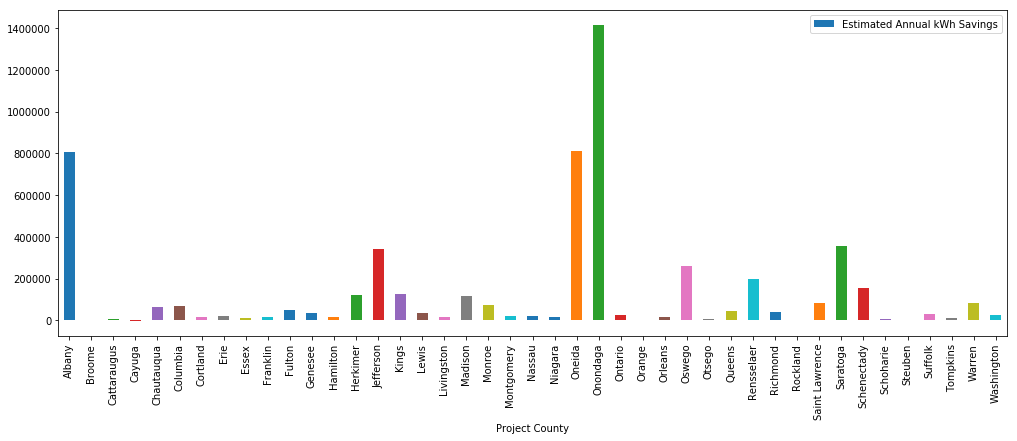

In [86]:
data_National_Grid3.plot.bar(x = 'Project County', y = 'Estimated Annual kWh Savings', figsize=(17,6) )

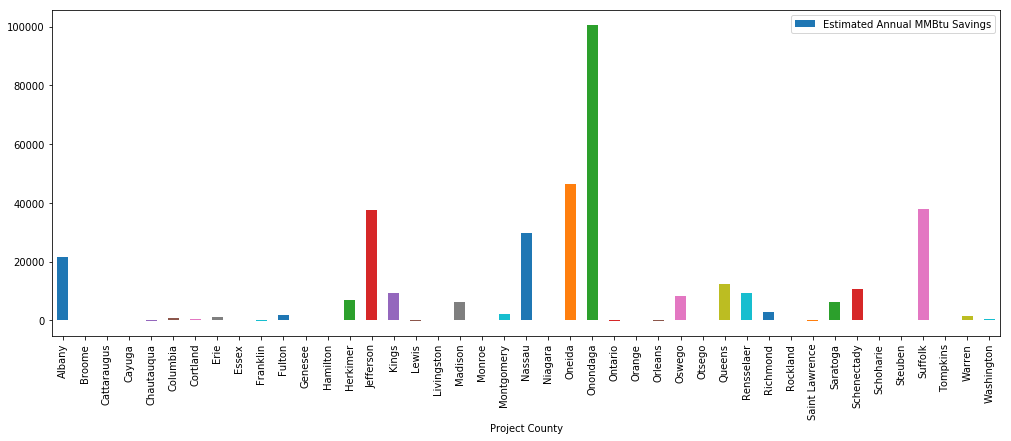

In [87]:
data_National_Grid3.plot.bar(x = 'Project County', y = 'Estimated Annual MMBtu Savings', figsize=(17,6) )

# Top 10 Energy saving county in kWh

In [88]:
data3.head()

,Project County,Project Zip,Total Project Cost,Total Incentives,Amount Financed Through Program,Year Home Built,Size of Home,Volume of Home,Number of Units,Estimated Annual kWh Savings,Estimated Annual MMBtu Savings,First Year Energy Savings $ Estimate
0,Albany,10349596,7382034,1579369,2805145.0,38731.0,40355.0,407874.0,21.0,908127.0,27127.0,621652
1,Allegany,414514,315008,68577,111983.0,5642.0,4788.0,46208.0,3.0,21686.0,1112.0,17433
2,Bronx,900032,1040414,170677,593540.0,5892.0,6020.0,65380.0,3.0,33876.0,3986.0,98954
3,Broome,10005989,6624563,1535591,3023375.0,46678.0,33505.0,493124.0,24.0,454573.0,30145.0,488148
4,Cattaraugus,926589,606322,126119,285976.0,0.0,0.0,0.0,0.0,66243.0,2834.0,58939


In [104]:
data_top_Energy_saver = data3[['Project County','Estimated Annual kWh Savings']]
data_top_Energy_saver.head()

,Project County,Estimated Annual kWh Savings
0,Albany,908127.0
1,Allegany,21686.0
2,Bronx,33876.0
3,Broome,454573.0
4,Cattaraugus,66243.0


In [109]:
data_top_Energy_saver2 = data_top_Energy_saver.sort_values(by =['Estimated Annual kWh Savings'], ascending = False)
data_top_Energy_saver2.head(10)

,Project County,Estimated Annual kWh Savings
27,Monroe,4295330.0
59,Westchester,1923625.0
14,Erie,1682915.0
33,Onondaga,1628163.0
32,Oneida,1076379.0
0,Albany,908127.0
13,Dutchess,778633.0
34,Ontario,753112.0
58,Wayne,595978.0
16,Franklin,561571.0


In [122]:
data_top10_Energy_saver = data_top_Energy_saver2[:10]
data_top10_Energy_saver

,Project County,Estimated Annual kWh Savings
27,Monroe,4295330.0
59,Westchester,1923625.0
14,Erie,1682915.0
33,Onondaga,1628163.0
32,Oneida,1076379.0
0,Albany,908127.0
13,Dutchess,778633.0
34,Ontario,753112.0
58,Wayne,595978.0
16,Franklin,561571.0


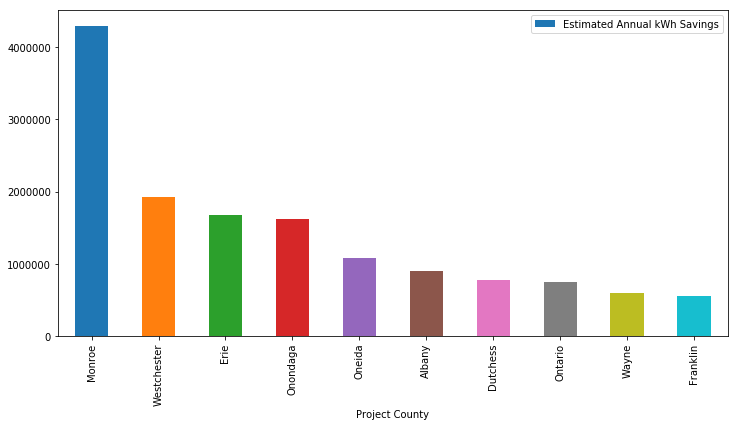

In [123]:
data_top10_Energy_saver.plot.bar(x='Project County', y='Estimated Annual kWh Savings', figsize=(12,6))

In [124]:
data_MMBtu_saver = data3[['Project County','Estimated Annual MMBtu Savings']]
data_MMBtu_saver.head()

,Project County,Estimated Annual MMBtu Savings
0,Albany,27127.0
1,Allegany,1112.0
2,Bronx,3986.0
3,Broome,30145.0
4,Cattaraugus,2834.0


In [128]:
data_top_MMBtu_saver2 = data_MMBtu_saver.sort_values(by = 'Estimated Annual MMBtu Savings', ascending = False)
data_top10_MMBtu_saver = data_top_MMBtu_saver2[:10]
data_top10_MMBtu_saver

,Project County,Estimated Annual MMBtu Savings
27,Monroe,236717.0
51,Suffolk,183160.0
14,Erie,143258.0
59,Westchester,130701.0
33,Onondaga,114458.0
29,Nassau,82931.0
32,Oneida,62642.0
22,Jefferson,41876.0
54,Tompkins,37657.0
34,Ontario,36086.0


# Visulaization with Pandas: Top 10 MMBtu saver counties 

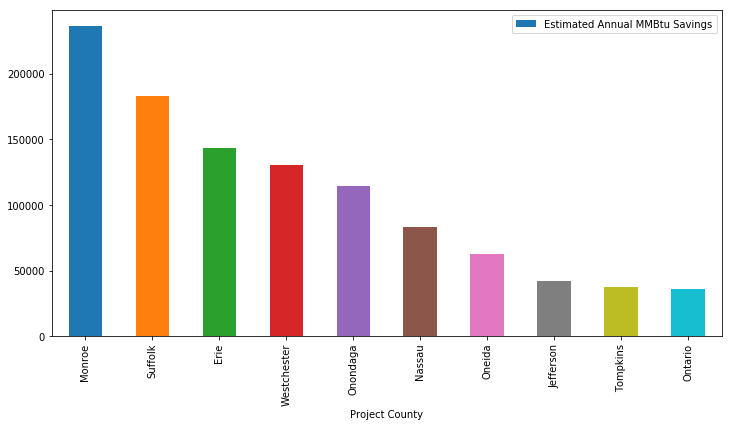

In [129]:
data_top10_MMBtu_saver.plot.bar(x='Project County', y ='Estimated Annual MMBtu Savings', figsize=(12,6) )

# Total Energy saved in kWh

In [143]:
total_kWh = data['Estimated Annual kWh Savings'].sum()
total_kWh

23005325.0

# Total Energy saved in MMBtu

In [144]:
total_MMBtu = data['Estimated Annual MMBtu Savings'].sum()
total_MMBtu

1579747.0

In [155]:
total = pd.DataFrame({'total_saved_kWh_MMBtu': [total_kWh, total_MMBtu], 'type_saved':['Estimated Annual Kwh Savings', 'Estimated Annual MMBtu Savings'] })
#total_saved_kWh_MMBtu = [total_kWh, total_MMBtu]
#type_saved = ['Estimated Annual MMBtu Savings', 'Estimated Annual MMBtu Savings']
total

,total_saved_kWh_MMBtu,type_saved
0,23005325.0,Estimated Annual Kwh Savings
1,1579747.0,Estimated Annual MMBtu Savings


<BarContainer object of 2 artists>

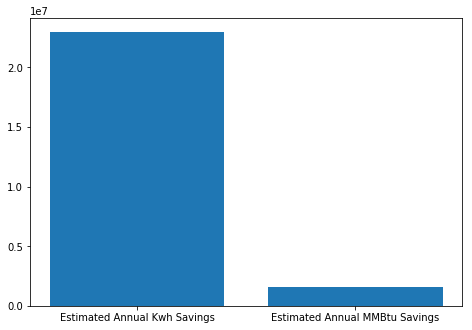

In [156]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(total['type_saved'], total['total_saved_kWh_MMBtu'])

In [ ]:
plt.bar(data['Estimated Annual kWh Savings'].sum())